C:\Users\Ganesh\AppData\Local\Temp\ipykernel_3348\528931116.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_gender = data.groupby(['sex', 'survived']).size().unstack()


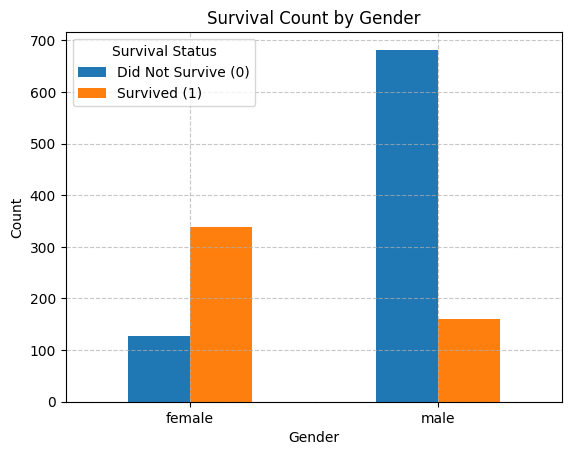

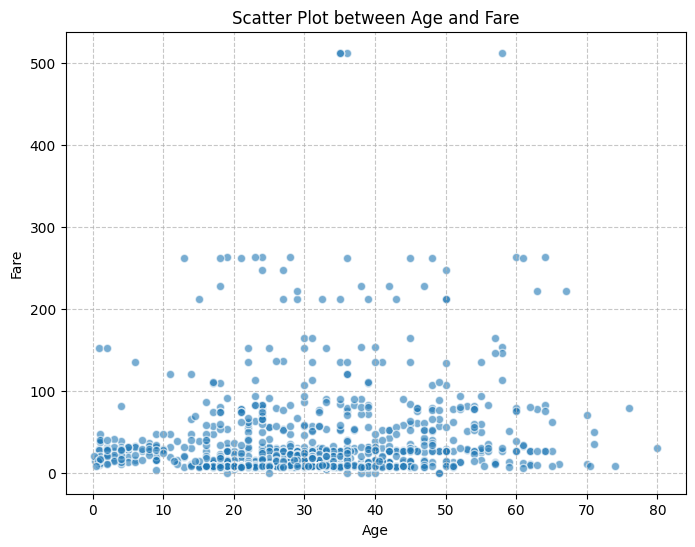

C:\Users\Ganesh\AppData\Local\Temp\ipykernel_3348\528931116.py:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature1].dropna(), shade=True, label=feature1.capitalize())
C:\Users\Ganesh\AppData\Local\Temp\ipykernel_3348\528931116.py:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature2].dropna(), shade=True, label=feature2.capitalize())


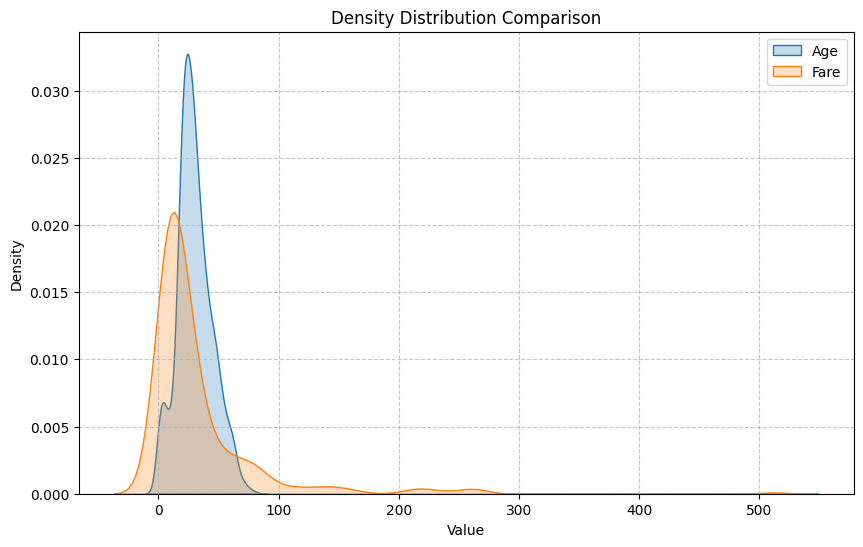

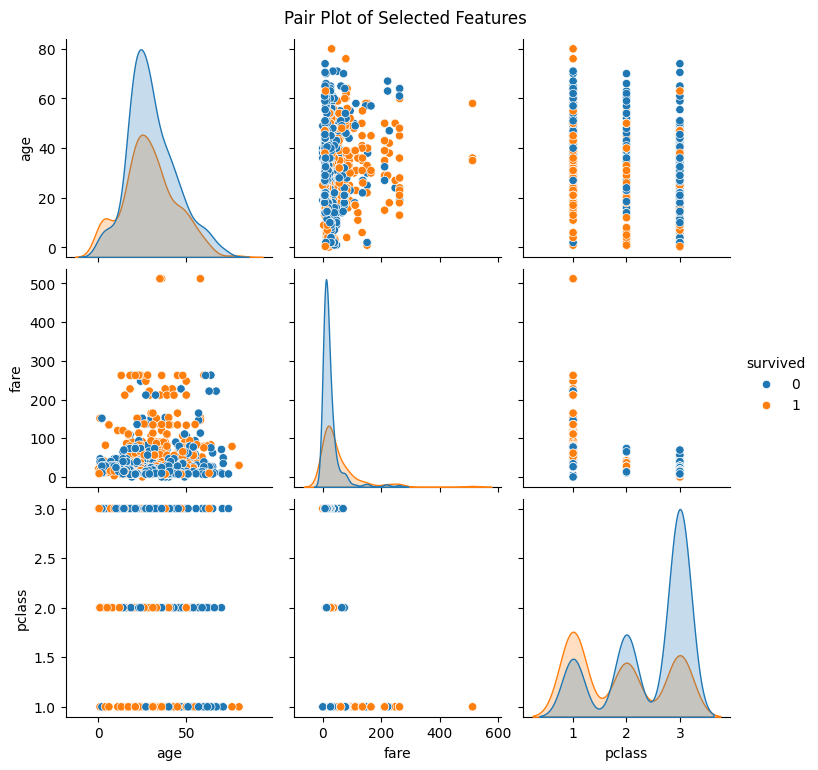

In [1]:
# titanic_sklearn_analysis.py

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_openml

def load_titanic_data():
    """Load Titanic dataset using sklearn from OpenML."""
    titanic = fetch_openml(name='titanic', version=1, as_frame=True)
    data = titanic.frame
    return data

def plot_survival_by_gender(data):
    """Plot bar chart of survivors and non-survivors separately for male and female passengers."""
    survived_gender = data.groupby(['sex', 'survived']).size().unstack()
    survived_gender.plot(kind='bar', stacked=False)
    plt.title('Survival Count by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend(['Did Not Survive (0)', 'Survived (1)'], title='Survival Status')
    plt.xticks(rotation=0)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def scatter_two_features(data, feature1='age', feature2='fare'):
    """Draw a scatter plot for any two selected features."""
    plt.figure(figsize=(8,6))
    plt.scatter(data[feature1], data[feature2], alpha=0.6, edgecolors='w')
    plt.title(f'Scatter Plot between {feature1.capitalize()} and {feature2.capitalize()}')
    plt.xlabel(feature1.capitalize())
    plt.ylabel(feature2.capitalize())
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def compare_density_distribution(data, feature1='age', feature2='fare'):
    """Compare density distribution for features: age and fare."""
    plt.figure(figsize=(10,6))
    sns.kdeplot(data[feature1].dropna(), shade=True, label=feature1.capitalize())
    sns.kdeplot(data[feature2].dropna(), shade=True, label=feature2.capitalize())
    plt.title('Density Distribution Comparison')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def show_pairplot(data, features=['age', 'fare', 'pclass', 'survived']):
    """Use pair plot to show pairwise bivariate distribution."""
    sns.pairplot(data[features].dropna(), hue='survived', diag_kind='kde')
    plt.suptitle('Pair Plot of Selected Features', y=1.02)
    plt.show()

# Example usage
if __name__ == "__main__":
    titanic_data = load_titanic_data()

    # Preprocessing: Convert 'survived' to integer (it might be 'str' from OpenML)
    titanic_data['survived'] = titanic_data['survived'].astype(int)
    titanic_data['fare'] = pd.to_numeric(titanic_data['fare'], errors='coerce')
    titanic_data['age'] = pd.to_numeric(titanic_data['age'], errors='coerce')
    
    plot_survival_by_gender(titanic_data)
    scatter_two_features(titanic_data, 'age', 'fare')
    compare_density_distribution(titanic_data, 'age', 'fare')
    show_pairplot(titanic_data)
